In [2]:
%pip install pandas
%pip install scikit.learn
%pip install joblib
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aluno\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aluno\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aluno\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\aluno\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [14]:
import pandas as pd
from joblib import dump
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, mean_absolute_error, r2_score, mean_squared_error
from sklearn.linear_model import ElasticNet, SGDRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
df = pd.read_csv('./diamonds.csv')
df.drop(columns=df.columns[0], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

In [16]:
dt = (df.dtypes == "object")
object_cols = list(dt[dt].index)

label_encoder = LabelEncoder()
for col in object_cols:
    df[col] = label_encoder.fit_transform(df[col])

X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

column_transformer = ColumnTransformer(
    [('onehot', OneHotEncoder(), object_cols)],
    remainder='passthrough'
)

X_train_encoded = column_transformer.fit_transform(X_train)
X_test_encoded = column_transformer.transform(X_test)

print(X_train_encoded)

[[0.   1.   0.   ... 8.23 8.19 4.77]
 [0.   0.   0.   ... 6.57 6.49 3.92]
 [0.   0.   0.   ... 6.59 6.54 4.1 ]
 ...
 [0.   0.   0.   ... 4.49 4.46 2.7 ]
 [0.   0.   0.   ... 6.13 6.03 3.82]
 [0.   0.   0.   ... 6.82 6.79 4.11]]


Cross-Validation Scores: [0.98174001 0.97767941 0.98061026 0.9805749  0.98099091]
Mean CV Score: 0.9803190984220878


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished



Training Set Metrics:
Mean Absolute Error: 101.17526485741062
Mean Squared Error: 42791.93614724249
R-squared Score: 0.9973120202011216


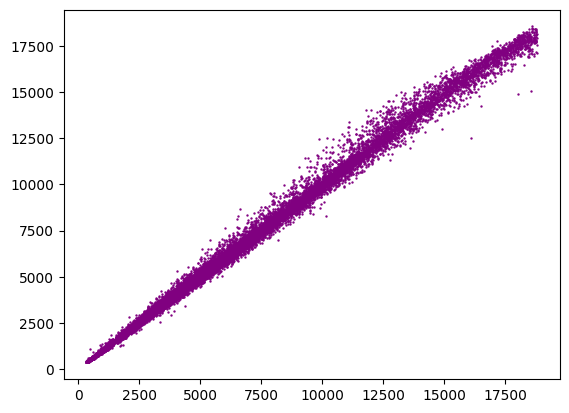


Test Set Metrics:
Mean Absolute Error: 270.2018471950021
Mean Squared Error: 302430.79293001647
R-squared Score: 0.9809753922281078


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.0s finished


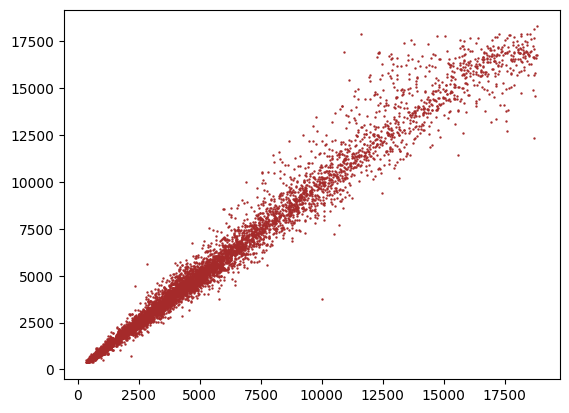

In [17]:
clf = RandomForestRegressor(n_jobs=-1, random_state=42)

scores = cv_scores = cross_val_score(clf, X_train_encoded, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

clf = RandomForestRegressor(verbose=True, n_jobs=-1, random_state=42)
clf.fit(X_train_encoded, y_train)
dump(clf, 'model_random_forest.pkl')

y_train_pred = clf.predict(X_train_encoded)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print("\nTraining Set Metrics:")
print("Mean Absolute Error:", train_mae)
print("Mean Squared Error:", train_mse)
print("R-squared Score:", train_r2)
plt.scatter(y_train, y_train_pred, s=0.5, c='purple')
plt.show()

y_test_pred = clf.predict(X_test_encoded)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTest Set Metrics:")
print("Mean Absolute Error:", test_mae)
print("Mean Squared Error:", test_mse)
print("R-squared Score:", test_r2)
plt.scatter(y_test, y_test_pred, s=0.5, c='brown')
plt.show()

[ -1.83259916  -0.61397314   0.41228542   0.73359814  -0.57859756
   0.75936032 -23.49780809 -11.97434398  -7.01471142  -5.98240114]
Start
Trained
1211.7392151738634


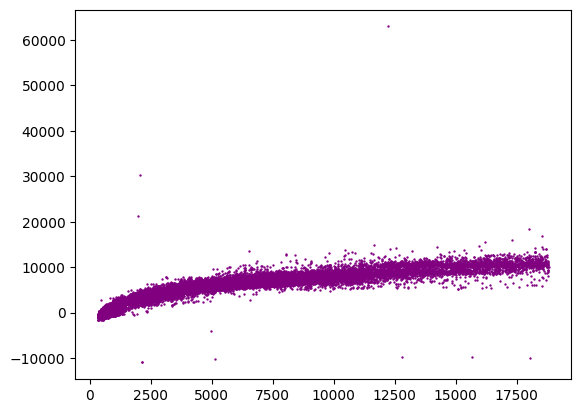

1200.4850707022954


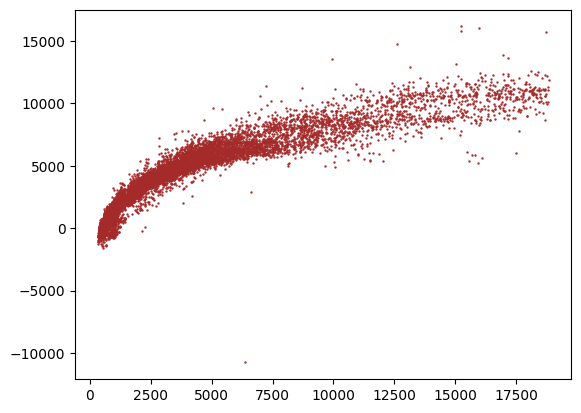

In [7]:
scores = cross_val_score(ElasticNet(), X, y, cv = 10)

print(scores)

# parameters = {
# }
regr = ElasticNet(random_state=42)
# clf = GridSearchCV(
#   regr,
#   parameters,
#   n_jobs = 4,
#   verbose=True
# )
clf = regr

print("Start")
clf.fit(X_train, y_train)
print("Trained")
# print(clf.best_params_)
# clf = clf.best_estimator_
dump(clf, 'model_elastic_net.pkl')

y_pred = clf.predict(X_train)
print(mean_absolute_error(y_train, y_pred))
plt.scatter(y_train, y_pred, s=0.5, c='purple')
plt.show()

y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred, s=0.5, c='brown')
plt.show()

c:\Users\aluno\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\aluno\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


[-9.09354805e+09 -8.64707684e+09 -4.21697172e+08 -2.19789363e+08
 -1.76492475e+08 -7.23441717e+07 -6.22830883e+10 -8.67990350e+09
 -5.24613959e+10 -7.45619932e+08]
Start
Trained
11195060.156145781


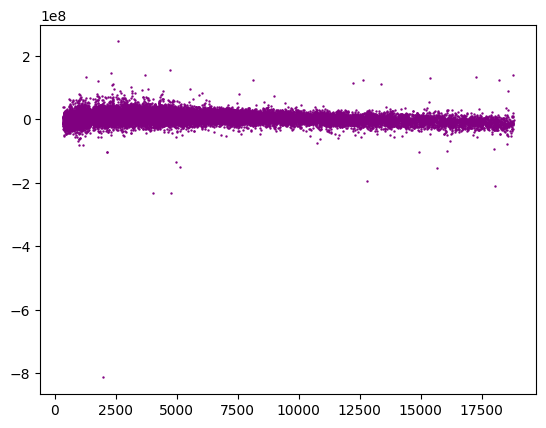

11248235.30584981


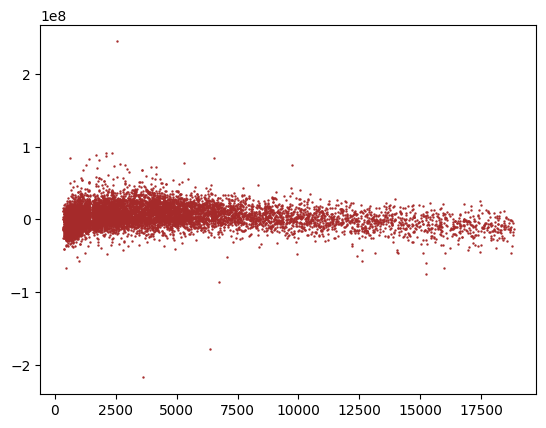

In [8]:
scores = cross_val_score(SGDRegressor(), X, y, cv = 10)

print(scores)

# parameters = {
# }
regr = SGDRegressor(random_state=42)
# clf = GridSearchCV(
#   regr,
#   parameters,
#   n_jobs = 4,
#   verbose=True
# )
clf = regr

print("Start")
clf.fit(X_train, y_train)
print("Trained")
# print(clf.best_params_)
# clf = clf.best_estimator_
dump(clf, 'model_sgd_regressor.pkl')

y_pred = clf.predict(X_train)
print(mean_absolute_error(y_train, y_pred))
plt.scatter(y_train, y_pred, s=0.5, c='purple')
plt.show()

y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))
plt.scatter(y_test, y_pred, s=0.5, c='brown')
plt.show()